<a href="https://colab.research.google.com/github/dig19998/Visionify-Tasks/blob/main/Package_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = cv2.dnn.readNetFromTensorflow('/content/drive/MyDrive/package_detector/training-temp/digvijayyadav48/confident_leavitt/frozen_inference_graph.pb', '/content/drive/MyDrive/package_detector/training-temp/digvijayyadav48/confident_leavitt/config.pbtxt')

## Camera Capture

In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


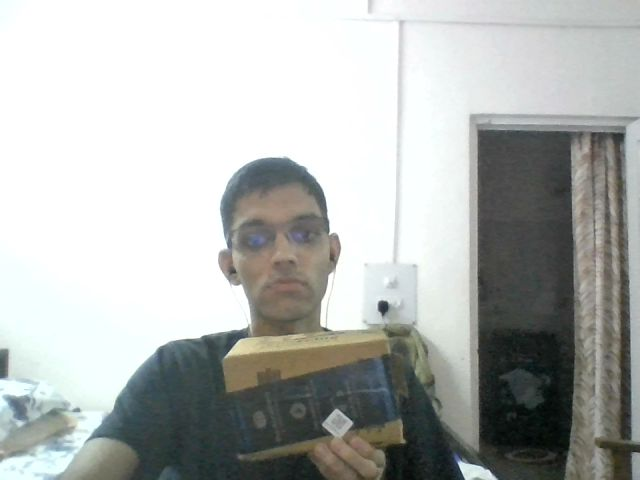

In [45]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Evaluating

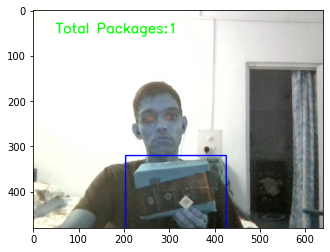

In [46]:
# Input image

#/content/1Thu_Dec__3_22_01_22_2020 copy 3.jpeg
# /content/Thu_Dec__3_22_01_24_2020.jpeg
# /content/Thu_Dec__3_23_03_50_2020.jpeg
# /content/Thu_Dec__3_22_01_26_2020.jpeg
# '/content/Thu_Dec__3_22_01_28_2020.jpeg'
# /content/Thu_Dec__3_22_01_30_2020.jpeg
# /content/Thu_Dec__3_23_03_50_2020.jpeg


img = cv2.imread('/content/photo.jpg')
rows, cols, channels = img.shape
 
# Use the given image as input, which needs to be blob(s).
model.setInput(cv2.dnn.blobFromImage(img,size = (520,520), swapRB=True, crop=False))
model.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
 
# Runs a forward pass to compute the net output
networkOutput = model.forward()
 
# Loop on the outputs
for detection in networkOutput[0,0]:
    
    score = float(detection[2])
    if score > 0.8:
      obj = 0
     
      left = detection[3] * cols
      top = detection[4] * rows
      right = detection[5] * cols
      bottom = detection[6] * rows
 
      #draw a blue rectangle around detected objects
      cv2.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), (0, 0, 255), thickness=2)
      obj+=1
      text = f'Total Packages:{obj}'
      org = (50,50)
      cv2.putText(img, text, org,cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2) 
 
# Show the image with a rectagle surrounding the detected objects 
# cv2.displayOverlay('blob', text)
plt.imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()